In [48]:
from numpy import *
from numpy.linalg import *
from matplotlib.pyplot import *

Testing out a jacobi iterative scheme on a 2D implicit finite difference (FD) discretization of the heat equation given by,
\begin{align}
\frac{\partial{T}}{\partial{t}} = \alpha \left[\frac{\partial{T}^2}{\partial{x}^2} + \frac{\partial{T}^2}{\partial{y}^2}\right]
\end{align}

Where $\alpha$ is a material dependent diffusivity term. The FD discretization is a follows: 
\begin{align}
T^{n+1,k+1}_{i,j} = \frac{T^{n}_{i,j}}{1 + 4K} + \frac{K}{1 + 4K} \left(T^{n+1,K}_{i-1,j} + T^{n+1,k}_{i+1,j} + T^{n+1,k}_{i,j-1}  + T^{n+1,k}_{i,j+1} \right)
\end{align}
Where $K = \frac{\alpha\Delta t}{\Delta x^{2}}$

In [49]:
def jacobi_implicit_scheme(T,T_prev_dt,nx,ny,K):
    Told = T.copy()
    for i in range(1,nx-1):
        for j in range(1,ny -1):
            dT = Told[i-1,j] + Told[i+1,j]+Told[i,j-1]+Told[i,j+1]
            T[i,j] = (1/(4*K + 1))*T_prev_dt[i,j] + (K/(1+4*K))*dT
    error = np.max(np.abs(T - Told))
    return T,error
    

In [50]:
def Gausseidel_implicit_Scheme(T,T_prev_dt,nx,ny,K):
    Told = T.copy()
    for i in range(1,nx-1):
        for j in range(1,ny -1):
            dT = T[i-1,j] + Told[i+1,j]+T[i,j-1]+Told[i,j+1]
            T[i,j] = (1/(4*K + 1))*T_prev_dt[i,j] + (K/(1+4*K))*dT
    error = np.max(np.abs(T - Told))
    return T,error

In [63]:
def SOR_implicit_Scheme(T,T_prev_dt,nx,ny,K):
    w = 4/3;
    Told = T.copy()
    for i in range(1,nx-1):
        for j in range(1,ny -1):
            dT = T[i-1,j] + Told[i+1,j]+T[i,j-1]+Told[i,j+1]
            T[i,j] = (1-w)*Told[i,j] + w*(1/(1+ 4*K))*T_prev_dt[i,j] + w*((K/(1+4*K))*dT)
            
    error = np.max(np.abs(T - Told))
    return T,error

In [64]:
nx = ny = 31
x = linspace(0,1,nx)
y = linspace(0,1,ny)
dt = 0.01

t_start = 0
t_end = 0.35
t = arange(t_start,t_end+dt,dt)
T = zeros((nx,nx))
tol = 1e-5

h = y[1] - y[0]
dt = t[1] -t[0]
alpha = 1.4
K = alpha*dt/h**2

## BCs

T[0,1:-1] = 900
T[-1,1:-1] = 600
T[1:-1,0] = 400
T[1:-1,-1] = 800
T[0,0] = 650
T[0,-1] = 850
T[-1,-1] = 700
T[-1,0] =500

In [65]:
pos1 = np.where(x == 0.5)[0][0]
pos1

15

In [66]:
iter = 0
Tmid = []
for i in range(len(t)):
    T_prev_dt = T.copy()
    err = 1
  
    while (err>= tol):
        T,err = SOR_implicit_Scheme(T,T_prev_dt,nx,ny,K)
        iter +=1
    Tmid.append(T[pos1, pos1])

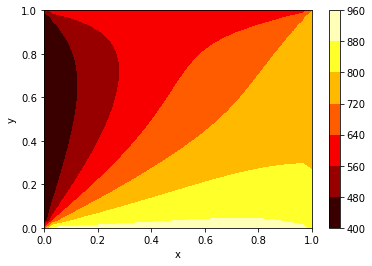

In [67]:
contourf(x, y, T, cmap='hot')
xlabel('x')
ylabel('y')
colorbar()
show()

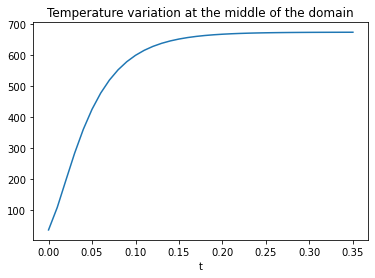

In [68]:
plot(t,array(Tmid))
title("Temperature variation at the middle of the domain")
xlabel("t")
show()

In [69]:
print(f"Number of iterations before convergence = {iter}")

Number of iterations before convergence = 3753
